

"I certify that the code and data in this assignment were generated independently,
using only the tools and resources defined in the course and that I did not receive
any external help, coaching or contributions during the production of this work."



In [ ]:
!pip install gym
!pip install google.colab

In [ ]:
!git clone https://github.com/Neil-Doshi/intro-to-machine-learning.git images


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gym import spaces
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from operator import add
from tabulate import tabulate
import cv2
from google.colab import widgets
import gym
import time
from copy import deepcopy

In [4]:
class GridEnvironment(gym.Env):
    metadata = { 'render.modes': []}

    def __init__(self):
        self.observation_space = spaces.Discrete(36)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 50
        
    def reset(self):
        self.timestep = 0
        self.agent_pos = np.array([0, 0])
        self.goal_pos = np.array([5, 5])
        self.gold_pos = np.array([4, 3])
        self.silver_pos = np.array([1, 1])
        self.monster_1 = np.array([2, 5])
        self.monster_2 = np.array([5, 1]) 
        self.pit_1 = np.array([0, 5])
        self.pit_2 = np.array([2, 4])

        agent_final_pos = self.agent_pos
        
        return agent_final_pos

    def step(self, action):
        test = deepcopy(self.agent_pos)

        self.state = np.random.choice(self.observation_space.n)
        if action == 0:
            self.agent_pos[0] += 1
        if action == 1:
            self.agent_pos[0] -= 1
        if action == 2:
            self.agent_pos[1] += 1
        if action == 3:
            self.agent_pos[1] -= 1

        self.agent_pos = np.clip(self.agent_pos, 0, 5)
        observation = self.agent_pos

        reward = -1
        # print(self.agent_pos)
        if (self.agent_pos == self.gold_pos).all():
            reward = 20
        if (self.agent_pos == self.silver_pos).all():
            reward = 15
        if (self.agent_pos == self.pit_1).all():
            reward = -1
        if (self.agent_pos == self.pit_2).all():
            reward = -1
        if (self.agent_pos == self.goal_pos).all():
            reward = 1000
        if (self.agent_pos == self.monster_1).all():
            reward = -20
        if (self.agent_pos == self.monster_2).all():
            reward = -20
        if (self.agent_pos == test).all():
            reward += -30
        test = deepcopy(observation)

        self.timestep += 1
        done = True if (self.timestep > self.max_timesteps) or (self.agent_pos == self.goal_pos).all() or (self.agent_pos == self.monster_1).all() or (self.agent_pos == self.monster_2).all() else False
        info = {}

        return observation, reward, done, info

    def render(self):
        fig, ax = plt.subplots(figsize=(10,10))
        ax.set_xlim(0,6)
        ax.set_ylim(0,6)

        #plot agent
        agent = AnnotationBbox(OffsetImage(plt.imread('./images/agent.png'), zoom = 0.5),np.add(self.agent_pos,[0.5,0.5]), frameon=False)
        ax.add_artist(agent)

        #plot monster_1
        if (self.agent_pos[0] != self.monster_1[0]) or (self.agent_pos[1] != self.monster_1[1]):
            monster_1 = AnnotationBbox(OffsetImage(plt.imread('./images/monster.png'), zoom = 0.5),np.add(self.monster_1,[0.5,0.5]), frameon=False)
            ax.add_artist(monster_1)

        #agent at monster 1
        elif (self.agent_pos[0] == self.monster_1[0]) and (self.agent_pos[1] == self.monster_1[1]):
            goal = AnnotationBbox(OffsetImage(plt.imread('./images/agent_died.png'), zoom = 0.5),np.add(self.monster_1,[0.5,0.5]), frameon=False)
            ax.add_artist(goal)

        #plot gold
        if (self.agent_pos[0] != self.gold_pos[0]) or (self.agent_pos[1] != self.gold_pos[1]):
            gold = AnnotationBbox(OffsetImage(plt.imread('./images/gold.png'), zoom = 0.5),np.add(self.gold_pos,[0.5,0.5]), frameon=False)
            ax.add_artist(gold)

        #agent at gold
        elif (self.agent_pos[0] == self.gold_pos[0]) and (self.agent_pos[1] == self.gold_pos[1]):
            gold = AnnotationBbox(OffsetImage(plt.imread('./images/agent_gold.png'), zoom = 0.5),np.add(self.gold_pos,[0.5,0.5]), frameon=False)
            ax.add_artist(gold)

        #plot monster_2
        if (self.agent_pos[0] != self.monster_2[0]) or (self.agent_pos[1] != self.monster_2[1]):
            monster_2 = AnnotationBbox(OffsetImage(plt.imread('./images/monster.png'), zoom = 0.5),np.add(self.monster_2,[0.5,0.5]), frameon=False)
            ax.add_artist(monster_2)

        #agent at monster 2
        elif (self.agent_pos[0] == self.monster_2[0]) and (self.agent_pos[1] == self.monster_2[1]):
            goal = AnnotationBbox(OffsetImage(plt.imread('./images/agent_died.png'), zoom = 0.5),np.add(self.monster_2,[0.5,0.5]), frameon=False)
            ax.add_artist(goal)

        #plot silver_pos
        if (self.agent_pos[0] != self.silver_pos[0]) or (self.agent_pos[1] != self.silver_pos[1]):
            silver = AnnotationBbox(OffsetImage(plt.imread('./images/silver.png'), zoom = 0.5),np.add(self.silver_pos,[0.5,0.5]), frameon=False)
            ax.add_artist(silver)

        #agent at silver_pos
        elif (self.agent_pos[0] == self.silver_pos[0]) and (self.agent_pos[1] == self.silver_pos[1]) :
            goal = AnnotationBbox(OffsetImage(plt.imread('./images/agent_silver.png'), zoom = 0.5),np.add(self.silver_pos,[0.5,0.5]), frameon=False)
            ax.add_artist(goal)

        #plot goal
        if (self.agent_pos[0] != self.goal_pos[0]) or (self.agent_pos[1] != self.goal_pos[1]):
            goal = AnnotationBbox(OffsetImage(plt.imread('./images/goal.png'), zoom = 0.5),np.add(self.goal_pos,[0.5,0.5]), frameon=False)
            ax.add_artist(goal)

        #agent at goal
        elif (self.agent_pos[0] == self.goal_pos[0]) and (self.agent_pos[1] == self.goal_pos[1]):
            goal = AnnotationBbox(OffsetImage(plt.imread('./images/agent_goal.png'), zoom = 0.5),np.add(self.goal_pos,[0.5,0.5]), frameon=False)
            ax.add_artist(goal)

        #plot pit_1
        if (self.agent_pos[0] != self.pit_1[0]) or (self.agent_pos[1] != self.pit_1[1]):
            pit = AnnotationBbox(OffsetImage(plt.imread('./images/pit.png'), zoom = 0.5),np.add(self.pit_1,[0.5,0.5]), frameon=False)
            ax.add_artist(pit)

        #agent at pit_1
        elif (self.agent_pos[0] == self.pit_1[0]) and (self.agent_pos[1] == self.pit_1[1]):
            goal = AnnotationBbox(OffsetImage(plt.imread('./images/agent_pit.png'), zoom = 0.5),np.add(self.pit_1,[0.5,0.5]), frameon=False)
            ax.add_artist(goal)

        #plot pit_2
        if (self.agent_pos[0] != self.pit_2[0]) or (self.agent_pos[1] != self.pit_2[1]):
            pit = AnnotationBbox(OffsetImage(plt.imread('./images/pit.png'), zoom = 0.5),np.add(self.pit_2,[0.5,0.5]), frameon=False)
            ax.add_artist(pit)

        #agent at pit_2
        elif (self.agent_pos[0] == self.pit_2[0]) and (self.agent_pos[1] == self.pit_2[1]):
            goal = AnnotationBbox(OffsetImage(plt.imread('./images/agent_pit.png'), zoom = 0.5),np.add(self.pit_2,[0.5,0.5]), frameon=False)
            ax.add_artist(goal)

        ax.set_xticks([0,1,2,3,4,5,6])
        ax.set_yticks([0,1,2,3,4,5,6])
        ax.grid()

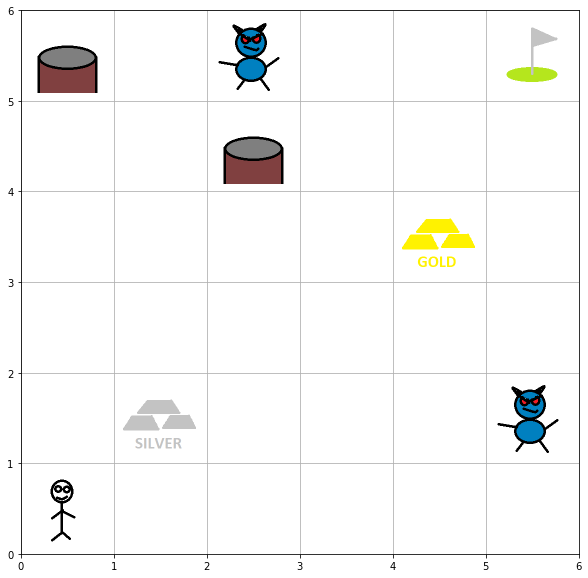

In [5]:
env = GridEnvironment()
obs = env.reset()
env.render()

In [6]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, observation):
    return np.random.choice(self.action_space.n)

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action = up   ,   Agent position = [5 5],   Reward = 1000


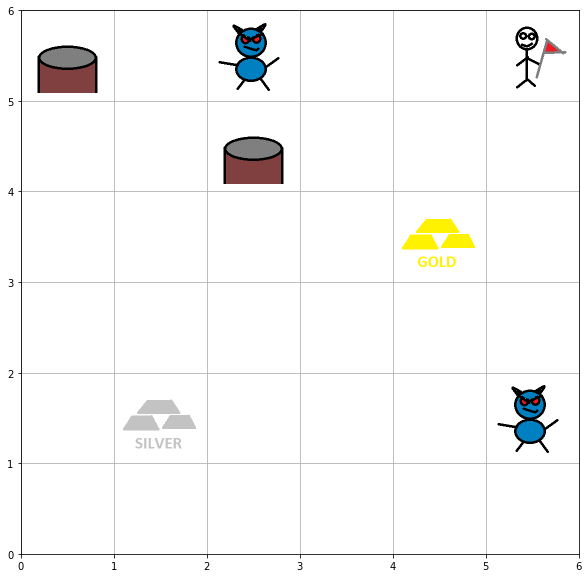

<IPython.core.display.Javascript object>

Action = left ,   Agent position = [0 0],   Reward = -31
Action = down ,   Agent position = [0 0],   Reward = -31
Action = right,   Agent position = [1 0],   Reward = -1
Action = right,   Agent position = [2 0],   Reward = -1
Action = right,   Agent position = [3 0],   Reward = -1
Action = right,   Agent position = [4 0],   Reward = -1
Action = up   ,   Agent position = [4 1],   Reward = -1
Action = up   ,   Agent position = [4 2],   Reward = -1
Action = right,   Agent position = [5 2],   Reward = -1
Action = up   ,   Agent position = [5 3],   Reward = -1
Action = up   ,   Agent position = [5 4],   Reward = -1
Action = down ,   Agent position = [5 3],   Reward = -1
Action = right,   Agent position = [5 3],   Reward = -31
Action = left ,   Agent position = [4 3],   Reward = 20
Action = up   ,   Agent position = [4 4],   Reward = -1
Action = up   ,   Agent position = [4 5],   Reward = -1
Action = up   ,   Agent position = [4 5],   Reward = -31
Action = down ,   Agent position = [4 4],   

In [7]:
env = GridEnvironment()
agent = RandomAgent(env)

obs = env.reset()
done = False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()
moves = []
while not done:
  action = agent.step(obs)
  obs, reward, done, info = env.step(action)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
    action_taken = {0: 'right', 1: 'left ', 2: 'up   ', 3: 'down '}
    print(f'Action = {action_taken[action]},   Agent position = {obs},   Reward = {reward}')
    moves.append((f'Action = {action_taken[action]},   Agent position = {obs},   Reward = {reward}'))
  time.sleep(1) 
for move in moves:
  print(move)


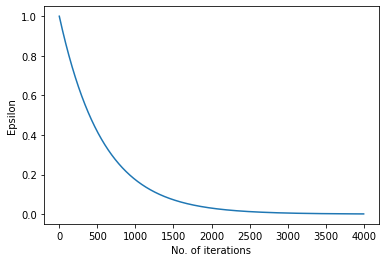

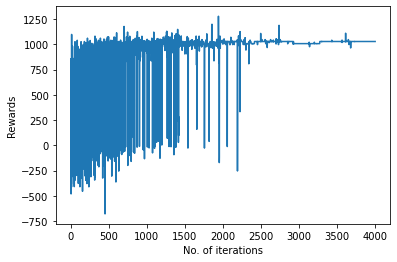

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Action = up   ,   Agent position = [5 5],   Reward = 1000


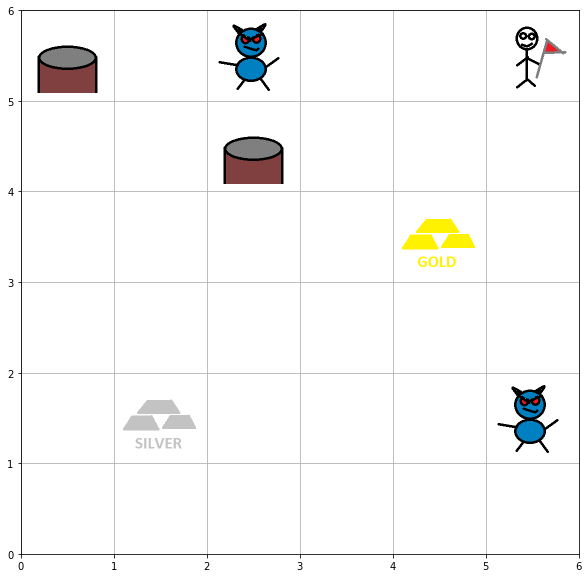

<IPython.core.display.Javascript object>

Action = up   ,   Agent position = [0 1],   Reward = -1
Action = right,   Agent position = [1 1],   Reward = 15
Action = up   ,   Agent position = [1 2],   Reward = -1
Action = up   ,   Agent position = [1 3],   Reward = -1
Action = right,   Agent position = [2 3],   Reward = -1
Action = right,   Agent position = [3 3],   Reward = -1
Action = right,   Agent position = [4 3],   Reward = 20
Action = right,   Agent position = [5 3],   Reward = -1
Action = up   ,   Agent position = [5 4],   Reward = -1
Action = up   ,   Agent position = [5 5],   Reward = 1000


In [14]:


def greedy_action(agent_pos, epsilon):
  if np.random.random() > epsilon:
    action = np.argmax(agent_pos)
  else:
    action = np.random.choice(env.action_space.n,1)[0]
  return action

def sarsa(episodes,alpha,gamma,decay,epsilon):
  env = GridEnvironment()
  q_table = np.zeros([6,6,env.action_space.n])
  rewards = []
  epsilons = []

  for epsiode in range(episodes):
    agent_pos = env.reset()
    done = False
    reward = 0
    action = greedy_action(q_table[agent_pos[0], agent_pos[1]], epsilon)
    while not done:
      observation, rew, done, info = env.step(action)
      next_action = greedy_action(q_table[observation[0], observation[1]], epsilon)
      q_table[agent_pos[0], agent_pos[1], action] = q_table[agent_pos[0], agent_pos[1], action] + alpha * (rew + (gamma * q_table[observation[0], observation[1], next_action]) - q_table[agent_pos[0], agent_pos[1], action])
      agent_pos = np.clip(observation,0,5)
      action = next_action
      reward = reward + rew

    rewards.append(reward)
    epsilons.append(epsilon)
    epsilon = epsilon * (1 - decay)

  optimal_policy = {}
  for i in range(6):
    for j in range(6):
      optimal_policy[(i, j)] = np.argmax(q_table[i,j,:])
  
  return q_table, epsilons, rewards, optimal_policy

def render(optimal_policy):
    env = GridEnvironment()
    observation = env.reset()
    output_grid = widgets.Grid(1, 1)
    with output_grid.output_to(0, 0):
      env.render()
    done = False
    movess = []
    while not done:
      action = optimal_policy[observation[0], observation[1]]
      observation, rew, done, info = env.step(action)
      with output_grid.output_to(0, 0):
        output_grid.clear_cell()
        env.render()
        action_taken = {0: 'right', 1: 'left ', 2: 'up   ', 3: 'down '}
        print(f'Action = {action_taken[action]},   Agent position = {observation},   Reward = {rew}')
        movess.append((f'Action = {action_taken[action]},   Agent position = {observation},   Reward = {rew}'))
      time.sleep(1)
    for move in movess:
      print(move)

alpha = 0.85
gamma = 0.95
iterations = 4000
epsilon = 1
decay = 0.00175
q_table, epsilon, rewards, optimal_policy = sarsa(iterations,alpha,gamma,decay,epsilon)


plt.plot(epsilon,label="Epsilon Graph")
plt.xlabel("No. of iterations")
plt.ylabel("Epsilon")
plt.show()

plt.plot(rewards,label="Rewards Graph")
plt.xlabel("No. of iterations")
plt.ylabel("Rewards")
plt.show()

render(optimal_policy)

# Reference

Class demo on environment, 
class demo on random agent,
piazza post video link to video guide by Nitin for rendering,
images were created by me using paint